In [3]:
# python 3.10.13

# 回归分析(Regression Analysis)

- 目标变量: target, y
- 特征变量(影响目标变量的因素): features, X
- 变量之间的关系: 模型, model, $f$, $y=wx+b$, 算法(algorithm)

- Actual value: 真实值, 实际值, y
- Predicted value: 预测值, 将x带入模型得到的值, $\hat{y}$
- Error: 误差, 预测值与真实值之间的差异, $\epsilon = y - \hat{y}$
- 最优解: 尽可能的找到一个模型, 使得误差最小, 整体的误差通常叫做损失Loss
  - 最小二乘法(Least Squares Method): 使得误差的平方和最小


具体地说，回归分析在一组数据的基础上研究这样几个问题： \
(i) 建立因变量 $y$ 与自变量 $x_1,x_2,\cdots,x_m$ 之间的回归模型 (经验公式);\
(ii) 对回归模型的可信度进行检验；\
(iii) 判断每个自变量 $x_i(i=1,2,\cdots,m)$ 对 $y$ 的影响是否显著；\
(iv)诊断回归模型是否适合这组数据；\
(v) 利用回归模型对 $y$ 进行预报或控制。

我们所涉及的均是$\textbf{样本点}\times\textbf{变量}$类型的数据表。\
n个样本点，一个样本点有m个变量，数据表为

$$
X=\left(\begin{array}{cccc}
x_{11} & x_{12} & \cdots & x_{1m} \\
x_{21} & x_{22} & \cdots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nm}
\end{array}\right)
= \left(\begin{array}{c}
e_{1}^{T} \\
e_{2}^{T} \\
\vdots \\
e_{n}^{T}
\end{array}\right)
= (x_{ij})_{n\times m}
$$

式中$e_i=(x_{i1},x_{i2},\cdots,x_{im})\in R^m,\quad i=1,2,\cdots,n.\quad e_i$被称为第$i$ 个样本点.\
样本的均值为

$$
\overline{x}=\left(\overline{x}_{1},\overline{x}_{2},\cdots,\overline{x}_{m}\right),\quad\overline{x}_{j}=\frac{1}{n}\sum_{i=1}^{n}x_{ij}\:,\quad j=1,2,\cdots,m
$$

## 一元线性回归

m=1时，称为一元线性回归。设因变量 $y$ 与自变量 $x$ 之间的关系是线性的，即

$$
y=\beta_{0}+\beta_{1}x+\varepsilon
$$

其中 $\beta_{0}$ 和 $\beta_{1}$ 是待定(回归)系数，$\varepsilon$ 是随即误差项，假定 $\varepsilon \sim N(0, \sigma^2)$，则$y\sim N(\beta_{0}+\beta_{1}x,\sigma^2)$。

若对y和x分别进行了n次观测，得到n对数据$(x_{1},y_{1}),(x_{2},y_{2}),\cdots,(x_{n},y_{n})$，则有n个方程

$$
\begin{array}{c}
y_{1}=\beta_{0}+\beta_{1} x_{1}+\varepsilon_{1} \\
y_{2}=\beta_{0}+\beta_{1} x_{2}+\varepsilon_{2} \\
\vdots \\
y_{n}=\beta_{0}+\beta_{1} x_{n}+\varepsilon_{n}
\end{array}
$$

主要任务:

1. 估计$\beta_{0}、\beta_{1}、\sigma^2$;
2. 对回归模型的可信度进行检验;
3. 用x的值对y进行预测: 估计值和预测区间;

### least square

ordinary least square (OLS): 普通最小二乘(平方)

#### 原理: 使残差平方和最小

取$\beta_{0}$和$\beta_{1}$的一组估计值$\hat{\beta}_{0}$和$\hat{\beta}_{1}$，若计

$$
Q(\beta_{0},\beta_{1})=\sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} x_{i}\right)^{2}
$$

则

$$
\sum_{i=1}^{n}\left(y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i}\right)^{2}
=Q(\hat{\beta}_{0},\hat{\beta}_{1})
=\min_{\beta_{0},\beta_{1}}Q(\beta_{0},\beta_{1})
$$

显然$Q(\beta_{0},\beta_{1})\geq 0$，且是关于$\beta_{0}$和$\beta_{1}$可微的二次函数，对$\beta_{0}$和$\beta_{1}$求偏导数，令其为零，得到

$$
\begin{array}{l}
\frac{\partial Q}{\partial \beta_{0}}=-2 \sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} x_{i}\right)=0 \\ \\
\frac{\partial Q}{\partial \beta_{1}}=-2 \sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} x_{i}\right) x_{i}=0
\end{array}
$$

整理得

$$
\left\{
\begin{aligned}
n\beta_{0}+\beta_{1} \sum_{i=1}^{n} x_{i} &=\sum_{i=1}^{n} y_{i} \\ \\
\beta_{0} \sum_{i=1}^{n} x_{i}+\beta_{1} \sum_{i=1}^{n} x_{i}^{2} &=\sum_{i=1}^{n} x_{i} y_{i}
\end{aligned}
\right.
$$

解得

$$
\left\{
\begin{aligned}
\hat{\beta}_{1} &=\frac{n \sum_{i=1}^{n} x_{i} y_{i}-\sum_{i=1}^{n} x_{i} \sum_{i=1}^{n} y_{i}}{n \sum_{i=1}^{n} x_{i}^{2}-\left(\sum_{i=1}^{n} x_{i}\right)^{2}}
=\frac{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)\left(y_{i}-\overline{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}} \\ \\
\hat{\beta}_{0} &=\overline{y}-\hat{\beta}_{1} \overline{x}
\end{aligned}
\right.
$$

称$\hat{\beta}_{0}$和$\hat{\beta}_{1}$为$\beta_{0}$和$\beta_{1}$的最小二乘估计，$\hat{\beta}_{0}$和$\hat{\beta}_{1}$是$\beta_{0}$和$\beta_{1}$的无偏估计。

关于$\hat{\beta}_{1}$的计算公式还有一种更直观的表示形式，即

$$
\begin{align}
\hat{\beta}_{1}
&
=\frac{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)\left(y_{i}-\overline{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}}\notag\\\notag\\
&
=\frac{\sqrt{\sum_{i=1}^{n}\left(y_{i}-\overline{y}\right)^{2}}}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}}}\cdot\frac{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)(y_{i}-\overline{y})}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}}\sqrt{\sum_{i=1}^{n}\left(y_{i}-\overline{y}\right)^{2}}}
\notag\\\notag\\
&
=\frac{s_{y}}{s_{x}}r_{xy}
\notag\\\notag\\
\end{align}
$$

式中$s_{x}^{2}=\frac{1}{n-1}\sum_{i=1}^{n}(x_{i}-\overline{x})^{2}\:,\:s_{y}^{2}=\frac{1}{n-1}\sum_{i=1}^{n}(y_{i}-\overline{y})^{2}\:,\:r_{xy}\:$是$x$与$y$的样本相关系数。
显然，当$x_i,y_i$都是标准化数据时，则有$\overline{x}=0,\quad\overline{y}=0,\quad s_x=1,\quad s_y=1$。所以， 有

$$
\hat{\beta}_{0}=0\:,\quad\hat{\beta}_{1}=r_{xy}
$$

回归方程为

$$\hat{y}=r_{\mathrm{xy}}x$$
由上可知，对标准化数据，$\hat{\beta}_{1}$可以表示 $y$ 与 x 的相关程度 。

### 拟合效果分析

#### 残差的样本方差

记残差

$$
e_{i}=y_{i}-\hat{y}_{i}=y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1} x_{i},\quad i=1,2,\cdots,n
$$

残差的样本均值

$$
\overline{e}=\frac{1}{n}\sum_{i=1}^{n} e_{i}=0
$$

残差的样本方差

$$
MSE=s_{e}^{2}=\frac{1}{n-2}\sum_{i=1}^{n} e_{i}^{2}
$$

由于$有\sum_{i=1}^{n} e_{i}=0$和$\sum_{i=1}^{n} x_{i} e_{i}=0$的约束，所以，残差平方和的自由度为$n-2$。是总体方差$\sigma^2=\text{Var}(\varepsilon)$的无偏估计。

#### 判定系数(拟合优度) $R^2$

### 假设检验

#### 回归模型的线性关系检验(F检验)
也称

在拟合回归方程之前，曾假设数据总体是符合线性正态误差模型的，也就是说，
$y$ 与 $x$ 之间的关系是线性关系，即

$$
y_i=\beta_{0}+\beta_{1} x_i+\varepsilon_i, \quad \varepsilon_i \sim N(0, \sigma^{2}), \quad i=1,2, \cdots, n
$$

然而，这种假设是否真实，还需进行检验。

对于一个实际观测的样本，虽然可以用判定系数$R^{2}$说明$y$与$\hat{y}$的相关程度，但是样本测度指标具有一定的随机因素，还不足以肯定$y$与$x$ 的线性关系。

假设$y$与$x$之间存在线性关系，则总体模型为

$$
y_{i}=\beta_{0}+\beta_{1}x_{i}+\varepsilon_{i}\:,\:i=1,2,\cdots,n
$$
 如果$\beta_1\neq0$,则称这个模型为全模型。用最小二乘法拟合全模型，并求出误差平方和为

$$
SSE=\sum_{i=1}^n(y_i-\hat{y}_i)^2
$$

现给出假设$H_0:\beta_1=0$。如果$H_{0}$假设成立，则

$$
y_{i}=\beta_{0}+\varepsilon_{i}
$$

这个模型被称为选模型。用最小二乘法拟合这个模型，则有

$$
\begin{array}{l}{\hat{\beta}_{1}=0}\\{\hat{\beta}_{0}=\overline{y}-\hat{\beta}_{1}\overline{x}=\overline{y}}\end{array}
$$
因此，对所有的$i=1,2,\cdots,n$,有

$$\hat{y}_i\equiv\bar{y}$$

该拟合模型的误差平方和为(预测每项都为$\bar{y}$，实际为$y_i$)

$$
\sum_{i=1}^n{(y_i-\bar{y})^2}=SST
$$

因此，有

$$SSE\leq SST$$

这就是说，全模型的误差总是小于(或等于)选模型的误差的。其原因是在全模型中有较多的参数，可以更好地拟合数据。

假若在某个实际问题中，全模型的误差并不比选模型的误差小很多的话，这说明$H_{0}$假设成立，即$\beta_{\mathrm{i}}$近似于零。因此，差额(SST-SSE)很少时，表明$H_{_0}$成立。若这个差额很大，说明增加了x 的线性项后，拟合方程的误差大幅度减少，则应否定 $H_{0}$ , 认为总体参数 $\beta_{1}$显著不为零。

假设检验使用的统计量为

$$
F=\frac{SSR/1}{SSE/(n-2)}=\frac{MSR}{MSE}
$$

式中

$$MSR=SSR/df_{R}=SSR/1\\$$
$$MSE=SSE/df_E=SSE/(n-2)$$
若假设$H_0:\beta_1=0$成立，则 SS$E/\sigma^2$与 SS$R/\sigma^2$是独立的随机变量，且
$$SSE/\sigma^{2}\sim\chi^{2}(n-2)\:,\:SSR/\sigma^{2}\sim\chi^{2}(1)$$

这时

$$
F=\frac{MSR}{MSE}\sim F(1,n-2)
$$

综上所述，为了检验是否可以用$x$ 的线性方程式来解释$\gamma$,可以进行下面的统计检验。记$\gamma_i$关于$x_i$的总体回归系数为$\beta_{1}$,则$F$检验的原假设$H_{0}$与备则假设$H_{1}$分别是

$$
H_{0}:\beta_{1}=0\:,\:H_{1}:\beta_{1}\neq0
$$

检验的统计量为

$$
F=\frac{MSR}{MSE}\sim F(1,n-2)\tag{17}
$$
 对于检验水平$\alpha$,按自由度($n_1=1,n_2=n-2$)查$F$ 分布表，得到拒绝域的临
界值$F_{\alpha}(1,n-2)$。决策规则为

若$F\leq F_\alpha(1,n-2)$,则接受$H_{0}$假设，这时认为$\beta_{1}$显著为零，无法用$x$的线性关系式来解释 $y$ .

若$F>F_{\alpha}(1,n-2)$,则否定$H_{0}$,接受$H_{1}$。这时认为$\beta_{1}$显著不为零，可以用$x$的线性关系来解释$y$。习惯上说，线性回归方程的$F$ 检验通过了。

需要注意的是，即使$F$检验通过了，也不说明

$$
y_{i}=\beta_{0}+\beta_{1}x_{i}+\varepsilon_{i}
$$

就是一个恰当的回归模型，事实上，当$H_{0}$假设被拒绝后，只能说明$y$与$x$之间存在显著的线性关系，但很有可能在模型中还包括更多的回归变量，而不仅仅是一个回归变量$x$ .

一般地，回归方程的假 设检验包括两个方面：一个是对模型的检验，即检验自变量与因变量之间的关系能否用一个线性模型来表示，这是由$F$ 检验来完成的；另一个检验是关于回归参数的检验，即当模型检验通过后，还要具体检验每一个自变量对因变量的影响程度是否显著。这就是下面要讨论的$t$ 检验。在一元线性分析中，由于自变量的个数只有一个，这两种检验是统一的，它们的效果完全是等价的。但是，在多元线性回归分析中，这两个检验的意义是不同的。从逻辑上说，一般常在$F$ 检验通过后，再进一步进行$t$检验。

#### 回归系数的显著性检验
回归参数的检验是考察每一个自变量对因变量的影响是否显著。换句话说，就是要检验每一个总体参数是否显著不为零。

首先看对$\beta_{1}=0$ 的检验。$\beta_{1}$代表$x_{\iota}$变化一个单位对$\gamma_{i}$的影响程度。对$\beta_{1}$的检验就是要看这种影响程度与零是否有显著差异。

由于

$$
\hat{\beta}_1\sim N(\beta_1,\frac{\sigma^2}{\sum_{i=1}^n(x_i-\overline{x})^2})
$$
 Var$( \hat{\beta} _1) = \frac {\sigma^2}{\sum _{i= 1}^n( x_i- \bar{x} ) ^2}$的点估计为

$$
S^2(\hat{\beta}_1)=\frac{MSE}{\sum_{i=1}^n(x_i-\overline{x})^2}
$$

容易证明统计量

$$
\frac{\hat{\beta}_{1}-\beta_{1}}{S(\hat{\beta}_{1})}\sim t(n-2)
$$

事实上，由于

### 预测区间与控制


## 多元线性回归

$$
X = \left(\begin{array}{cccc}
x_{11} & x_{12} & \cdots & x_{1m} \\
x_{21} & x_{22} & \cdots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nm}
\end{array}\right)
\\\quad\\
x_i = x^{(i)} = \left(\begin{array}{c}
x_{i1} \\
x_{i2} \\
\vdots \\
x_{im}
\end{array}\right)
,\quad
y = \left(\begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{n}
\end{array}\right)
$$
$$
w = W = \theta = \beta = \left(\begin{array}{c}
w_0 \\
w_1 \\
\vdots \\
w_m
\end{array}\right)
$$
$$\begin{aligned}
&\hat{y} = XW = X\theta = h_{\theta}(x) =X\beta
\\
&(\hat{y_i})_{1\times 1} = h_{\theta}(x^{(i)}) = (x^{(i)})^T\theta = (x^{(i)})^T\theta
\end{aligned}$$
$$
\begin{aligned}
&\epsilon = y - \hat{y}
\\
&\epsilon_i = y_i - \hat{y_i}
\end{aligned}
$$

### Loss Function(Cost Function)

用最小二乘法表示 Loss Function

$$
\begin{aligned}
J(\theta) &= \frac{1}{2}\sum_{i=1}^{n}(\hat{y_i} - y_i)^2\\
&= \frac{1}{2}\sum_{i=1}^{n}(x^{(i)T}\theta - y_i)^2
\\
&= \frac{1}{2}(X\theta - y)^T(X\theta - y)
\end{aligned}
$$

sklearn的写法(矩阵、范数写法):
$$
\min_{w} ||Xw - y||_2^2
$$

#### 正规方程(Normal Equation)
Loss Function为下凸函数, 令Loss Function 的导数为0，得到正规方程
$$
\begin{aligned}
&\frac{\partial J(\theta)}{\partial \theta} = 0
\\
&X^TX\theta = X^Ty
\\
&\theta = (X^TX)^{-1}X^Ty
\end{aligned}
$$

#### disadvantages
正规方程（Normal Equation）是一种通过解析方式直接求解线性回归模型最优参数的方法。正规方程通过设置损失函数的导数为零，直接求解出能够使损失函数最小化的参数值。对于线性回归模型 $y = X\beta + \epsilon$，其中 $y$ 是因变量向量，$X$ 是设计矩阵，$\beta$ 是参数向量，$\epsilon$ 是误差项，正规方程给出的最优参数 $\beta$ 的解析解为：$ \beta = (X^TX)^{-1}X^Ty $

正规方程的主要缺点包括：

1. **计算复杂度高**：当特征数量很大时，计算 $X^TX$ 的逆矩阵非常耗时。矩阵逆的计算复杂度大约为 $O(m^3)$，其中 $m$ 是特征的数量。因此，当特征数达到几千或更多时，使用正规方程求解会变得非常慢。

2. **矩阵可逆性**：正规方程要求 $X^TX$ 必须是可逆的（或非奇异的）。但在某些情况下，比如特征之间存在多重共线性（即特征之间高度相关），或者特征数量大于样本数量时，$X^TX$ 可能是奇异的，从而无法直接求逆。虽然可以通过添加正则化项来解决这个问题，但这超出了简单正规方程的范畴。

3. **不适用于所有模型**：正规方程是针对线性回归模型的解析解。对于非线性模型或者包含复杂损失函数的模型，可能无法直接求得解析解，这时就需要使用梯度下降或其他优化算法来求解。

因此，虽然正规方程在特征数量较少且不存在多重共线性时是一个有效且直接的求解方法，但在实际应用中，特别是在处理大规模数据集时，梯度下降及其变体通常是更可行的选择。

#### GD(梯度下降法, Gradient Descent)

$$
\begin{aligned}
\theta_j^{n+1} = &\theta_j^n - \eta \frac{\partial J(\theta)}{\partial \theta_j}\\\quad\\
\frac{\partial J(\theta)}{\partial \theta_j} &= \frac{1}{2}\cdot2(h_{\theta}(x) - y)\cdot\frac{\partial}{\partial \theta_j}(h_{\theta}(x) - y)\\
&= (h_{\theta}(x) - y)\cdot\frac{\partial}{\partial \theta_j}(\sum_{i=0}^{m}\theta_i x_i - y)\\
&= (h_{\theta}(x) - y)x_j
\end{aligned}
$$
$$
\begin{aligned}
\theta^{n+1}= &\theta^n - \eta \cdot X^T(X\theta - y)
\end{aligned}
$$

其中$i=1,2,\cdots,n$表示样本点，$j=0,1,2,\cdots,m$表示特征变量, 
使用**偏置项, 即解决 $x_0^{(i)}=1$**.

### example

#### 1. 一元线性回归

$$
\hat{y} = \theta_0 + \theta_1x
$$

[2] [1]
[[1.77217986]
 [1.06302752]]


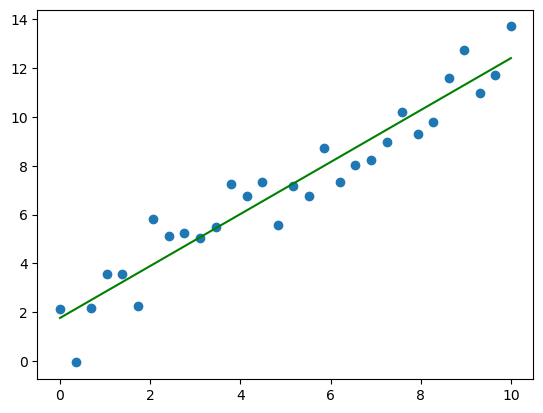

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# 生成数据(一元)
# 等差数列. 重塑形状为(-1, 1), -1表示自动计算行数(第一个形状)
X = np.linspace(0, 10, num=30).reshape(-1, 1)
w = np.random.randint(1, 5, size=1) # 随机[1, 5)之间的整数,形状为(1,)
b = np.random.randint(1, 10, size=1)
y = w * X + b + np.random.randn(30, 1) # (30, 1)的标准正态分布的随机数

plt.scatter(X, y)
X_30_2 = np.concatenate((np.ones((30, 1)), X), axis=1)
theta = np.linalg.inv(X_30_2.T @ X_30_2) @ X_30_2.T @ y
print(b, w)
print(theta)
plt.plot(X, X_30_2 @ theta, color='g')

#### 2. 二元线性回归

$$
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 \\
\hat{y}_{n\times 1} = X_{n\times 3}\theta_{3\times 1}\\
\hat{y}_i = \theta_0 + \theta_1x_{i1} + \theta_2x_{i2}
$$

X.shape: (100, 3)
w.shape: (3, 1)
y.shape: (100, 1)
w.T(实际theta): [[1 4 3]]
theta.T: [[-0.00486488  3.82095536  3.09122367]]
theta.T in sk.LR: [[-0.00486488  3.82095536  3.09122367]]
epsilon.T: [[-4.46159749e+01  1.11114181e+02 -5.87483923e+01 -5.88710600e+01
  -8.43240586e+01 -7.51431443e+01 -1.52268217e+02 -6.66708013e+01
  -2.92430257e-01  1.51497799e+02  1.55488889e+02  1.19565388e+02
  -7.69409336e+00  1.05007942e+01 -3.45943918e+01  1.64867989e+02
  -1.61998162e+02 -7.61890410e+01 -6.35891831e+00  8.10282049e+01
   5.45405470e+01 -1.77211808e+02  1.18922068e+01 -2.94661957e+02
  -1.19907439e+02 -4.87442561e+01  7.52218052e+01  2.71756154e+00
   2.93661304e+01  2.74074707e+01 -6.69478153e+01  6.32566041e+01
  -5.93737268e+01  4.69477570e+01  9.49975765e+01 -5.65610582e+01
  -8.68005688e+01 -5.76824683e+01  8.51397658e+01  1.09038914e+02
   1.17318287e+02  3.72686505e+01  1.20448567e+02  9.30129366e+01
   8.54361549e+01  4.01363051e+01  1.45568527e+02 -1.67325693e-01
  -2.94773879e

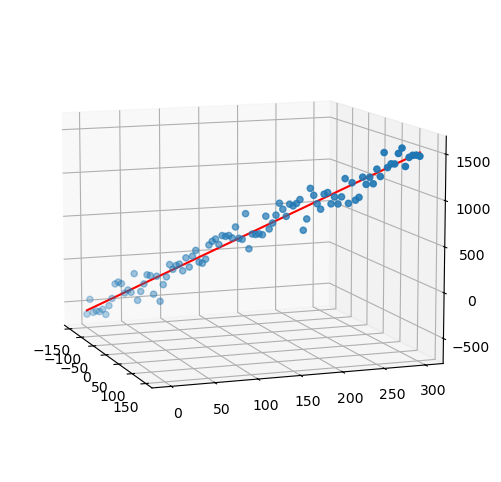

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression(fit_intercept=False)
obj_num = 100
x_0 = np.ones((obj_num, 1))
x_1 = np.linspace(-150, 150, num=obj_num).reshape(-1, 1)
x_2 = np.linspace(0, 300, num=obj_num).reshape(-1, 1)
X = np.concatenate((x_0, x_1, x_2), axis=1)
w0 = np.random.randint(1, 10, size=1)
w1to2 = np.random.randint(1, 5, size=2) # (2,)
w = np.concatenate((w0, w1to2), axis=0).reshape(-1, 1) # (3, 1)
y = X @ w + 100*np.random.randn(obj_num, 1)
print(f"X.shape: {X.shape}")
print(f"w.shape: {w.shape}")
print(f"y.shape: {y.shape}")
# print(f"X.T: {X.T}")
# print(f"y.T: {y.T}")

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1, x_2, y)
ax.view_init(elev=10, azim=-20) # 俯仰角, 方位角

# 伪逆可帮助处理 (X^TX) 矩阵可能的奇异性或接近奇异性的情况
# theta = np.linalg.inv(X.T @ X) @ X.T @ y
theta = np.linalg.pinv(X.T @ X) @ X.T @ y
print(f"w.T(实际theta): {w.T}")
print(f'theta.T: {theta.T}')
LR_model.fit(X, y)
print(f'theta.T in sk.LR: {LR_model.coef_}')
# 误差
epsilon = y - X @ theta
print(f"epsilon.T: {epsilon.T}")
epsilon1 = y - LR_model.predict(X)
print(f"epsilon1.T: {epsilon1.T}")

x_index = np.linspace(-150, 150, num=100)
y_index = np.linspace(0, 300, num=100)
z_index = theta[0] + theta[1] * x_index + theta[2] * y_index
z_index = LR_model.coef_[0][0] + LR_model.coef_[0][1] * x_index + LR_model.coef_[0][2] * y_index
ax.plot(x_index, y_index, z_index, color='r')

plt.show()

#### 3. 回归房价预测 
Boston House Price Prediction

In [6]:
import pandas as pd
from sklearn.utils import Bunch
def load_boston_aa(file_path):
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.data'):
        df = pd.read_csv(file_path, sep='\s+', header=None)
    frame = df
    NArr = df.to_numpy()
    data = NArr[:, :-1]
    target = NArr[:, -1]
    frame = None
    # 自住房屋的中位数价格(单位:千美元)
    target_names = 'MEDV'
    fdescr = 'Boston house prices dataset.'
    feature_names = [
        'CRIM', # 犯罪率
        'ZN', # 住宅用地所占比例 25000平方英尺以上的比例
        'INDUS', # 非零售商业用地比例
        'CHAS', # 查尔斯河虚拟变量(边界是河流则为1,否则为0)
        'NOX', # 一氧化氮浓度(环境指标, 单位:千万分之一)
        'RM', # 每个住宅的平均房间数
        'AGE', # 1940年以前建成的自住单位比例
        'DIS', # 距离波士顿五个就业中心的加权距离
        'RAD', # 径向公路的可达性指数
        'TAX', # 每一万美元的不动产税率
        'PTRATIO', # 学生与教师的比例
        'B', # 1000(Bk - 0.63)^2 其中Bk是黑人比例
        'LSTAT' # 低收入人群比例
    ] 
    return Bunch(
        data=data,
        target=target,
        frame=frame,
        target_names=target_names,
        DESCR=fdescr,
        feature_names=feature_names,
    )

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\aa\AppData\Local\Temp\ipykernel_34100\836531900.py:7: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', header=None)


In [7]:
# from sklearn.datasets import load_boston

# # 使用相对路径指定数据集的下载和缓存位置
# data_home = './datasets'
# housing = load_boston(data_home=data_home)

import pandas as pd

# 假设 boston.data 文件的路径为 'path/to/boston.data'
file_path = 'datasets/boston.data'
boston_d = load_boston_aa(file_path)
X = boston_d.data
y = boston_d.target
# print(boston_d.feature_names)
X.shape, y.shape

((506, 13), (506,))

##### 3.1 拆分数据: 80%训练集和20%测试集

In [8]:
# 打乱数据集
index = np.arange(X.shape[0])
np.random.shuffle(index)
train_index = index[:int(X.shape[0] * 0.802)]
test_index = index[int(X.shape[0] * 0.802):]

# X_train, y_train = X.iloc[train_index], y.iloc[train_index]
# X_test, y_test = X.iloc[test_index], y.iloc[test_index]
X_train, y_train = X[train_index], y[train_index]
X_test, y_test = X[test_index], y[test_index]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((405, 13), (405,), (101, 13), (101,))

##### 3.2 训练模型(数据建模)
$$
L(\beta) = \sum_{i=1}^{n}(\hat{y}_i - y_i)^2\\
\hat{y}_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \cdots + \beta_mx_{im}
$$

In [9]:
LR_model = LinearRegression(fit_intercept=True)
LR_model.fit(X_train, y_train)
np.set_printoptions(suppress=True)
display(LR_model.coef_, LR_model.intercept_)

array([ -0.11726827,   0.04349904,   0.01495398,   3.37565356,
       -18.33000945,   4.03635277,  -0.00700359,  -1.49604527,
         0.29532465,  -0.0113353 ,  -0.93493665,   0.00776025,
        -0.48671658])

35.46538565129091

##### 3.3 预测\验证\应用\评估

In [10]:
y_test_ = LR_model.predict(X_test).round(2)
y_test_, y_test

(array([22.94, 34.65, 12.41, 24.75, 32.9 , 22.75, 20.22, 26.25, 25.33,
        23.69, 13.98, 23.62, 17.63, 19.97, 17.35,  5.89, 28.03, 17.45,
        21.39, 28.47, 14.77, 24.66, 32.81, 14.91, 27.44, 17.16, 26.26,
        19.32,  6.06, 13.35, 20.21, 25.19, 13.74, 18.35, 24.65, 24.32,
        17.46, 19.03, 14.57, 35.97, 22.27, 34.56, 25.57, 30.72, 36.63,
        28.79, 16.97, 20.83, 42.34, 16.44, 23.97, 36.03, 18.27, 24.06,
        13.25, 20.  , 27.31, 22.3 , 15.91, 20.44, 24.2 , 22.59, 32.77,
        32.22, 19.28, 41.91, 18.7 , 17.04, 35.37, 21.23, 22.88,  9.66,
        22.36, 10.42, 19.34, 22.68, 15.87, 22.99, 22.7 , 20.78, 31.02,
        24.34, 23.2 , 15.47, 20.74, 36.81, 24.72, 18.39, 11.6 , 24.51,
        21.27, 25.01, 17.11, 27.77, 15.26, 27.22, 13.3 , 22.84, 28.62,
        25.11, 26.98]),
 array([50. , 39.8, 13.8, 24.7, 27. , 17. , 13.1, 22.6, 28.1, 21.9, 17.2,
        22.2, 17.2, 24.3, 23.2, 10.5, 28.7, 14.3, 21.2, 33.4, 14.8, 29.6,
        41.3, 11. , 23.7, 13.4, 20.7, 12.5,  8.

$$
\begin{aligned}
&\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i - y_i)^2\\
&\text{RMSE} = \sqrt{\text{MSE}}\\
&\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|\hat{y}_i - y_i|\\
&R^2= 1 - \frac{\sum_{i=1}^{n}(\hat{y}_i - y_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
\end{aligned}
$$

In [11]:
R_square_test = LR_model.score(X_test, y_test)
R_square_train = LR_model.score(X_train, y_train)
R_square_test, R_square_train

(0.7203978310879772, 0.7438062027257898)

In [12]:
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(y_test, y_test_)
MSE_train = mean_squared_error(y_train, LR_model.predict(X_train))
MSE_test, MSE_train

(21.17292079207921, 22.182028775499518)

## 正则化(Regularization)
![图 0](images/9bc3dd1b62f3635e3004a4b9c70d45e261599ae68915cede2b32ca6a8a8595d8.png)

一种用于减少模型过拟合的技术，通过在损失函数中添加一个惩罚项来实现。这个惩罚项限制了模型的复杂度，从而使模型在训练数据上的表现不会过于完美，以期在未见过的数据上具有更好的泛化能力。正则化通常用于线性回归、逻辑回归、神经网络等多种机器学习模型中。

可以增加模型的**鲁棒性**(Robustness)

正则化的主要类型包括：

1. L1正则化（Lasso 回归）：在损失函数中添加系数的绝对值之和作为惩罚项。这种方法可以导致某些系数变为零，从而实现特征的自动选择，有助于简化模型并减少维度。

    惩罚项：$\lambda \sum_{i=1}^{n} |w_i|$，其中 $\lambda$ 是正则化强度，$w_i$ 是模型系数。

2. L2正则化（Ridge 回归）：在损失函数中添加系数的平方和作为惩罚项。这种方法会惩罚大的系数值，使系数更加平滑，但不会将它们完全减少到零。

    惩罚项：$\lambda \sum_{i=1}^{n} w_i^2$。

3. 弹性网（Elastic Net）：结合了L1和L2正则化的特点，同时使用两者作为惩罚项。这种方法结合了Lasso回归的特征选择能力和Ridge回归的稳定性。

    惩罚项：$\lambda_1 \sum_{i=1}^{n} |w_i| + \lambda_2 \sum_{i=1}^{n} w_i^2$。

在这些方法中，$\lambda$（或$\lambda_1$、$\lambda_2$）是正则化参数，用于控制惩罚项的强度。选择合适的$\lambda$值是正则化过程中的一个关键步骤，通常通过交叉验证来确定。

正则化通过限制模型的复杂度来减少过拟合，但如果正则化强度过高，也可能导致模型欠拟合。因此，找到正则化强度的最佳值是确保模型既不过拟合也不欠拟合的关键。

$$
L_1= ||w||_1 = \sum_{i=1}^{n} |w_i|, \quad 对应曼哈顿距离 \\
L_2= ||w||_2 = (\sum_{i=1}^{n} w_i^2)^{\frac{1}{2}}, \quad 对应欧几里得距离\\
L_p= ||w||_p = (\sum_{i=1}^{n} |w_i|^p)^{\frac{1}{p}}, \quad 对应p范数
$$

### Lasso Regression (L1正则化, 套索回归)

线性回归的损失函数如下:

$$\begin{aligned}
J(\theta) &= \frac{1}{2}\sum_{i=1}^{n}(\hat{y}_i - y_i)^2 \\
&= \frac{1}{2}\sum_{i=1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})^2\\
&= \frac{1}{2}(X\theta - y)^T(X\theta - y)
\end{aligned}
\\
\hat{y}_i = \theta_0 + \theta_1x_{i1} + \theta_2x_{i2} + \cdots + \theta_mx_{im}
$$

L1正则化的损失函数如下, 令$J_0=J(\theta)$:

$$
J = J_0 + \lambda\sum_{i=1}^{n}|\theta_i|
$$

sklearn的写法(矩阵、范数写法):
$$
\min_{w} \frac{1}{2n_{\text{samples}}} ||Xw - y||_2^2 + \alpha||w||_1
$$

$\frac{1}{2n_{\text{samples}}}$ 是一个常数，可以省略。在岭回归中可能是由不同的开发者写的，省略了这个常数。

令$L_1 = \lambda\sum_{i=1}^{n}|\theta_i|$，则有:

$$
J=J_0+L_1
$$

$\lambda$ 是正则化系数。<br>
其他写法:

$$
J = J_0 + \alpha\sum_{i=1}^{n}|w_i|
$$

当在$J_0$的基础上加上$L_1$时，相当于在$L_1$的约束下，最小化$J_0$。<br>
二维情况下，$L_1$的约束是一个菱形，$L_2$的约束是一个圆形，$J_0$容易与$L_1$的角先接触, 从而更容易使得某些权重为0(即产生稀疏模型)，进而可以进行特征选择。

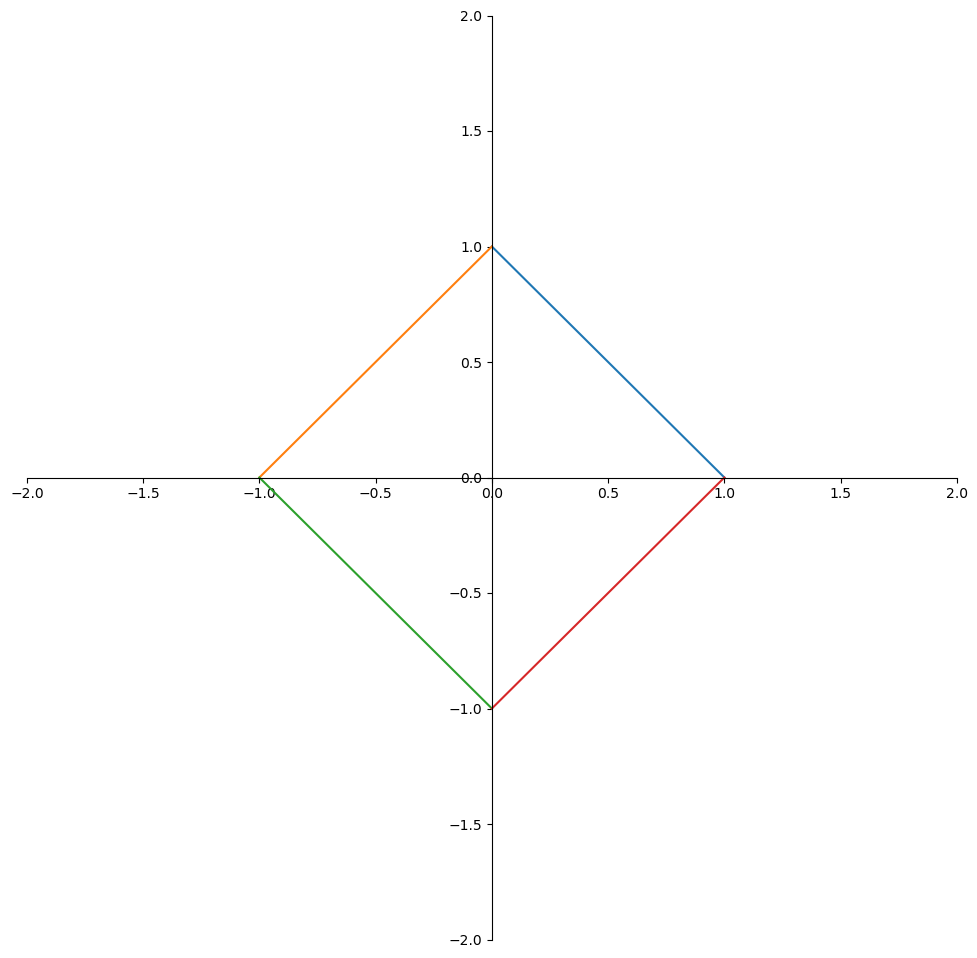

In [13]:
import numpy as np
import matplotlib.pyplot as plt #  # type: ignore
def f1(x):
    return 1 - x
x1 = np.linspace(0, 1, 50)
y1 = f1(x1)
def f2(x):
    return 1 + x
x2 = np.linspace(-1, 0, 50)
y2 = f2(x2)
def f3(x):
    return -1 - x
x3 = np.linspace(-1, 0, 50)
y3 = f3(x3)
def f4(x):
    return -1 + x
x4 = np.linspace(0, 1, 50)
y4 = f4(x4)

fig, ax = plt.subplots(figsize=(12, 12))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.plot(x1, y1)
ax.plot(x2, y2)
ax.plot(x3, y3)
ax.plot(x4, y4)
plt.show()

$\lambda$越大，$L1$的图形越小(约束越强), 最优解的值$w$越小.

#### GD
$$\begin{aligned}
\theta_j^{n+1} &= \theta_j^n - \eta\cdot\frac{\partial J}{\partial \theta_j}\\
&= \theta_j^n - \eta\cdot\frac{\partial}{\partial \theta_j} (J_0 + L_1)\\
\end{aligned}\\
\begin{aligned}
\frac{\partial J_0}{\partial \theta_j} 
&= \frac{\partial}{\partial \theta_j} \frac{1}{2}\sum_{i=1}^{n}(\hat{y}_i - y_i)^2 \\
&= \sum_{i=1}^{n}(\hat{y}_i - y_i)x_{ij}\\
&= \sum_{i=1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})x_{ij} \\
\frac{\partial L_1}{\partial \theta_j}
&= \lambda \cdot sign(\theta_j)
\end{aligned}$$
综上:
$$
\theta_j^{n+1} = \theta_j^n - \eta\cdot\sum_{i=1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})x_{ij} - \eta\cdot\lambda \cdot sign(\theta_j)
$$
- Lasso回归比线性回归多了一项: $\quad-\eta\cdot\lambda \cdot sign(\theta_j)$
- $eta>0$, 学习率, 其他写法: $\alpha$
- $\lambda>0$, $L_1$正则化系数, 其他写法: $\alpha$
- $w_j>0$ 时, 减去 $\eta\cdot\lambda$ , $w_j$ 变小, 从而靠近0
- $w_j<0$ 时, 加上 $\eta\cdot\lambda$ , $w_j$ 变大, 从而靠近0

### Ridge Regression (L2正则化, 岭回归)

$$\begin{aligned}
J &= J_0 + L_2\\
&= \frac{1}{2}\sum_{i=1}^{n}(\hat{y}_i - y_i)^2 + \lambda\sum_{j=1}^{n}w_j^2\\\quad\\
\frac{\partial L_2}{\partial w_j} &= 2\lambda\cdot w_j
\end{aligned}$$
$2\lambda$ 也是常系数，可以合并到 $\lambda$ 中。
$$\begin{aligned}
\theta_j^{n+1} &= \theta_j^n - \eta\cdot\sum_{i=1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_{j} - \eta\cdot\lambda\cdot w_j\\
&= \theta_j^n(1-\eta\cdot\lambda) - \eta\cdot\sum_{i=1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_{j}
\end{aligned}$$

scikit-learn官网的矩阵写法:
$$
\min_{w} ||Xw - y||^2_2 + \alpha||w||^2_2
$$

In [14]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# noise: standard deviation. n_informative: number of informative features
X, y, coefficients = make_regression(n_samples=100, n_features=5, noise=10, 
                       coef=True, random_state=42)

if X.shape[1] == 1:
    plt.scatter(X, y)
    plt.xlabel('Feature - X')
    plt.ylabel('Target - y')
elif X.shape[1] == 2:
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Target')
    ax.view_init(elev=10, azim=-20)

In [15]:
# sag: Stochastic Average Gradient. alpha: regularization strength
ridge_model = Ridge(alpha=1, solver='sag')
ridge_model.fit(X, y)
ridge_model.coef_, ridge_model.intercept_, coefficients, ridge_model.score(X, y)

(array([61.24650449, 97.78687197, 60.24841325, 54.36709705, 35.37685164]),
 0.023075209301200772,
 array([60.57748194, 98.65152488, 64.59172413, 57.07783047, 35.60967259]),
 0.9954091471846432)

In [16]:
# penalty: l2, alpha: regularization strength, l1_ratio: l1 regularization
sgd_model = SGDRegressor(penalty='l2', alpha=1, l1_ratio=0)
sgd_model.fit(X, y)
sgd_model.coef_, sgd_model.intercept_, sgd_model.score(X, y)

(array([32.22165769, 45.88695896, 20.7100568 , 26.62815446, 20.65909203]),
 array([4.61304277]),
 0.7210905288916851)

In [17]:
lr_model = LinearRegression()
lr_model.fit(X, y)
lr_model.coef_, lr_model.intercept_, lr_model.score(X, y)

(array([61.83002653, 98.93196386, 61.31053663, 54.99112667, 35.59006051]),
 -0.08525293377129906,
 0.9955395169111729)

In [18]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1)
lasso_model.fit(X, y)
lasso_model.coef_, lasso_model.intercept_, lasso_model.score(X, y)

(array([60.88282275, 97.74419111, 59.6364044 , 53.89763138, 34.80381553]),
 -0.02822165180026559,
 0.9952472766223496)

### Elastic Net (弹性网)
https://scikit-learn.org/stable/modules/linear_model.html#elastic-net
$$
\min_{w} \frac{1}{2n_{\text{samples}}} ||Xw - y||^2_2 + \alpha\rho||w||_1 + \frac{\alpha(1-\rho)}{2}||w||^2_2
$$
在很多特征是相关的情况下(如身高和体重), 弹性网可以保持这些特征, 而Lasso会选择一个。

In [19]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X, y)
elastic_model.coef_, elastic_model.intercept_, elastic_model.score(X, y)

(array([58.9520949 , 93.45243708, 56.23427856, 51.98674514, 34.4955791 ]),
 0.42508043082350433,
 0.9925119908492215)

### example

工业-蒸汽量预测

In [20]:
import pandas as pd
data_train = pd.read_csv('datasets/zhengqi/zhengqi_train.txt', sep='\t')
data_test = pd.read_csv('datasets/zhengqi/zhengqi_test.txt', sep='\t')
X_train = data_train.iloc[:, :-1]
y_train = data_train.iloc[:, -1]

## 多项式回归(Polynomial Regression)

(array([[1.82829486]]),
 array([2.59602879]),
 0.7523494164414336,
 array([[-1.54444824,  3.46485096]]),
 array([3.11228054]),
 0.920138376293373)

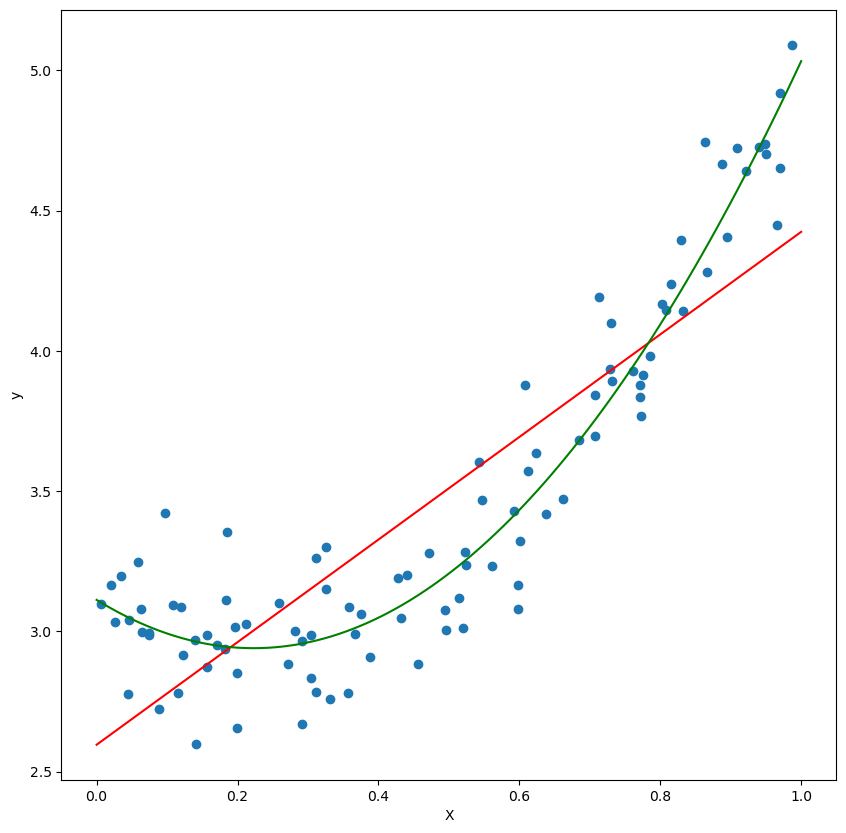

In [21]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 100
n_features = 1
noise = 0.2 # 噪声标准差
np.random.seed(42)
X = np.random.rand(n_samples, n_features)
a, b, c = 3, -1, 3
y = a * X**2 + b * X + c + np.random.randn(n_samples, n_features) * noise

# 可视化生成的数据
plt.figure(figsize=(10, 10));plt.scatter(X, y); plt.xlabel('X'); plt.ylabel('y')

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X, y)
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred_test = lr_model.predict(X_test)
plt.plot(X_test, y_pred_test, color='r')

X_12 = np.concatenate((X, X**2), axis=1)
lr_model2 = LinearRegression()
lr_model2.fit(X_12, y)
X_test_12 = np.concatenate((X_test, X_test**2), axis=1)
y_pred_test2 = lr_model2.predict(X_test_12)
plt.plot(X_test, y_pred_test2, color='g')

lr_model.coef_, lr_model.intercept_, lr_model.score(X, y), lr_model2.coef_, lr_model2.intercept_, lr_model2.score(X_12, y)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False)
A = [[1, 2], 
     [3, 4]]
poly.fit_transform(A)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  9., 12., 16.]])

In [23]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
# 不自己与自己相乘
A = [[1, 2], 
     [3, 4]]
poly.fit_transform(A)

array([[ 1.,  1.,  2.,  2.],
       [ 1.,  3.,  4., 12.]])

(array([[ 0.        , -1.54444824,  3.46485096]]),
 array([3.11228054]),
 0.920138376293373)

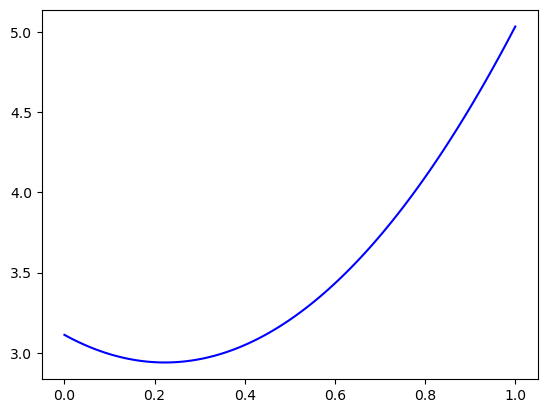

In [24]:
poly = PolynomialFeatures(degree=2)
X_2 = poly.fit_transform(X)
# X.shape, X_2.shape
lr_model3 = LinearRegression()
lr_model3.fit(X_2, y)
X_test_2 = poly.fit_transform(X_test)
y_pred_test3 = lr_model3.predict(X_test_2)
plt.plot(X_test, y_pred_test3, color='b')
lr_model3.coef_, lr_model3.intercept_, lr_model3.score(X_2, y)

### example

中国人寿保费预测

In [25]:
import pandas as pd
import seaborn as sns
data  = pd.read_excel('datasets/中国人寿.xlsx')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


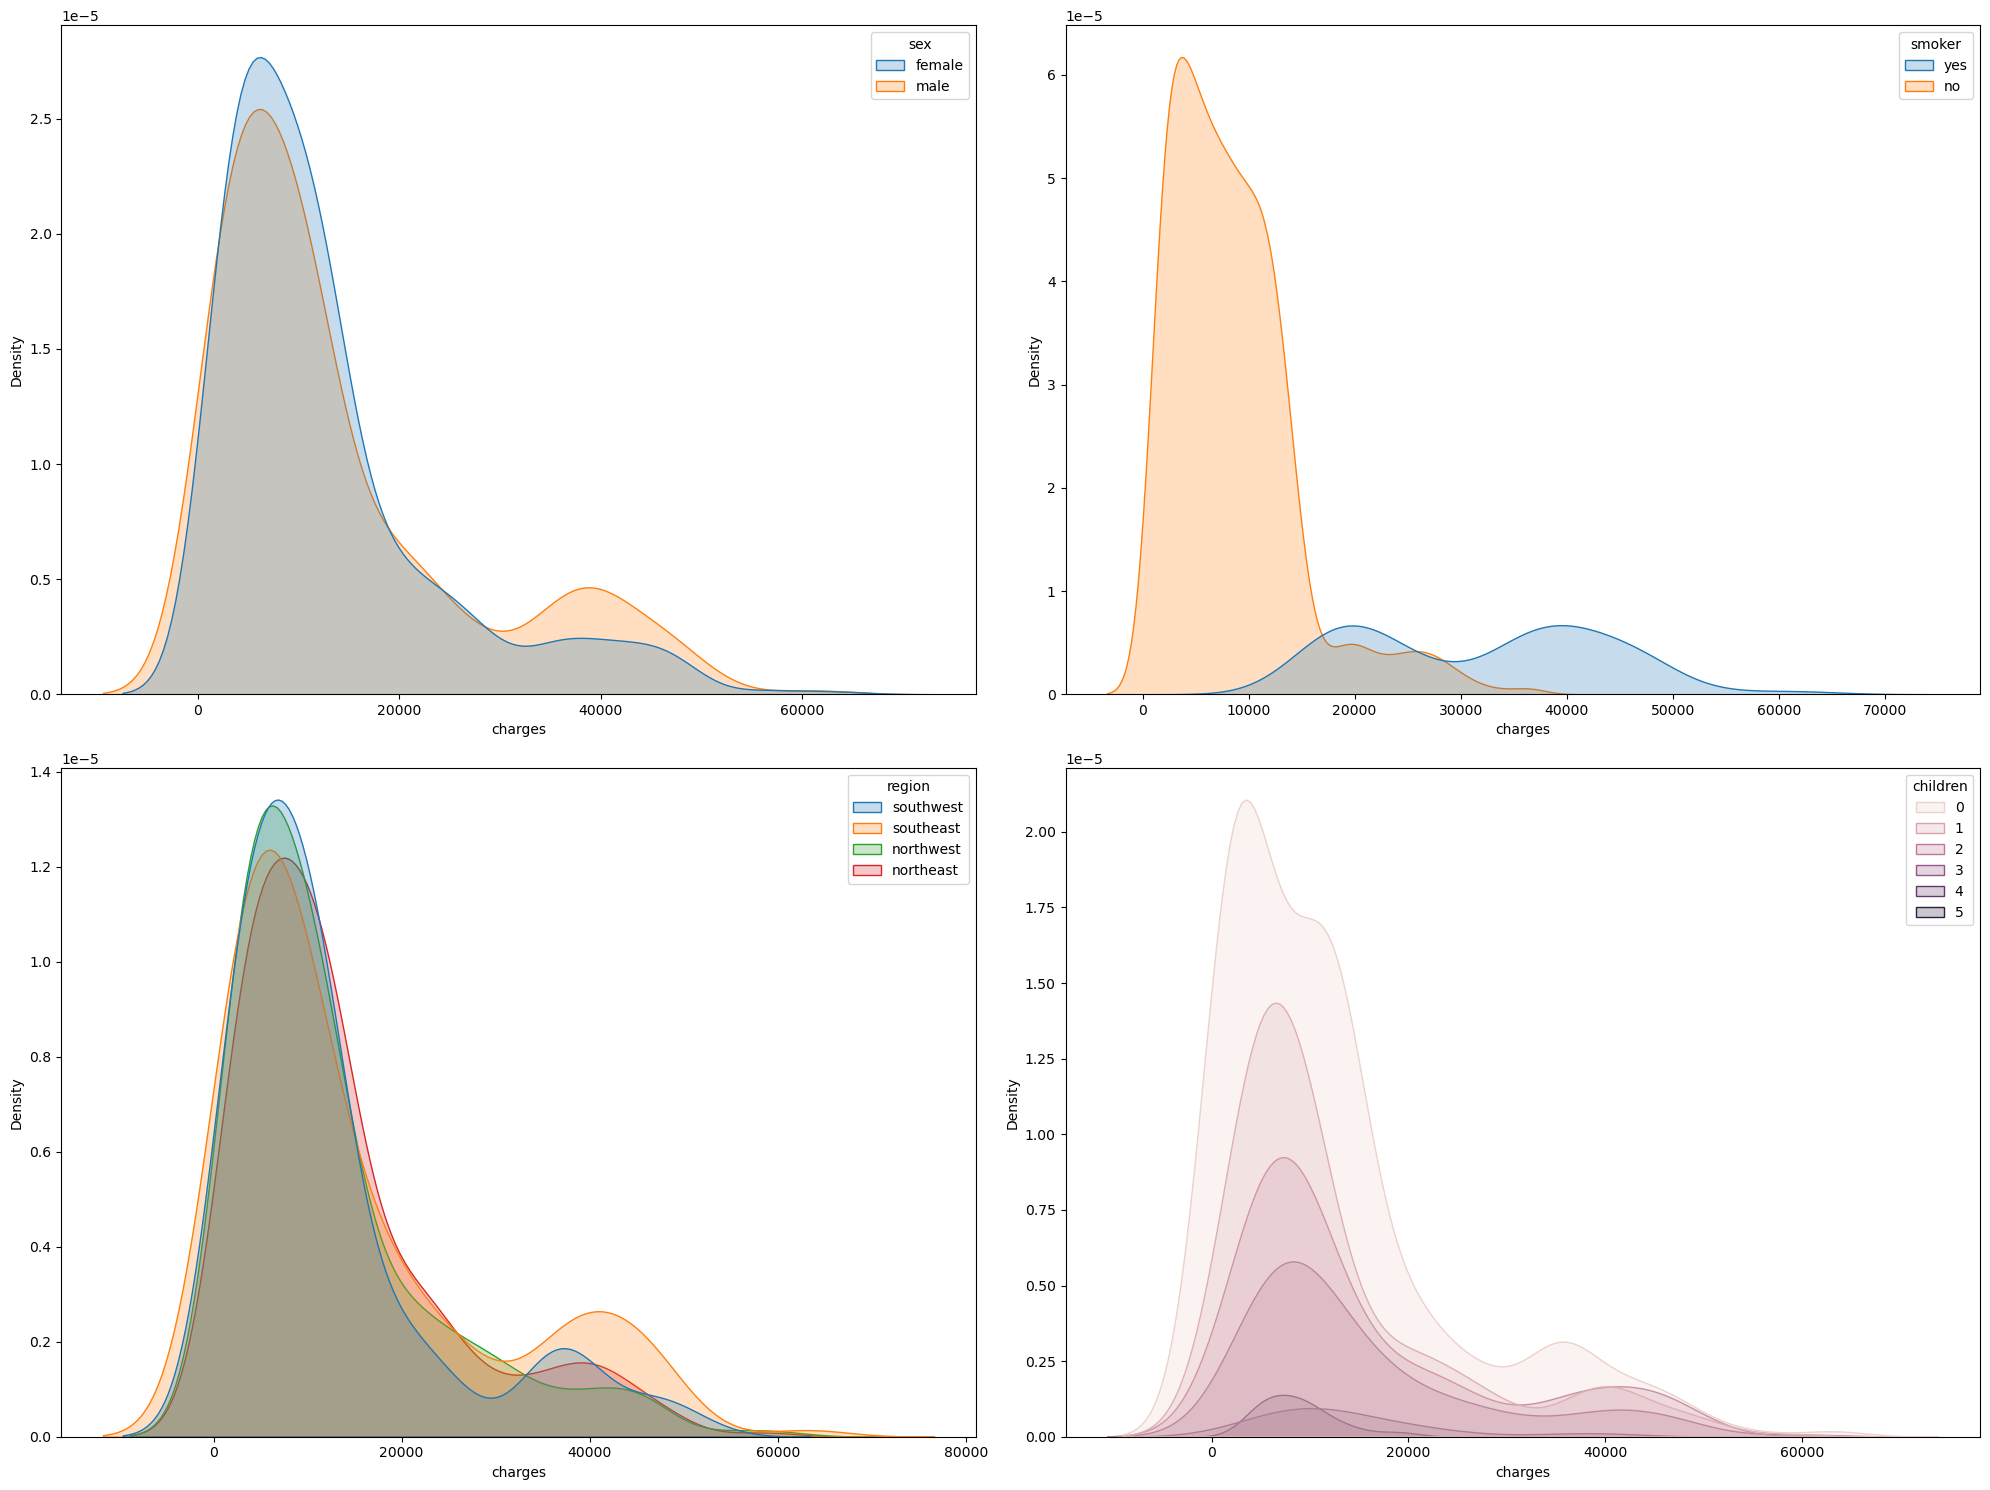

In [26]:
# density plot
import matplotlib.pyplot as plt
import seaborn as sns

# 设置画布大小
plt.figure(figsize=(20, 15))

# 创建4个子图的网格
# 第一个参数是行数，第二个参数是列数
# figsize参数可以调整以适应你的屏幕和需求

# 绘制第一个子图
plt.subplot(2, 2, 1) # 2行2列的第1个位置
sns.kdeplot(data=data, x='charges', hue='sex', fill=True)

# 绘制第二个子图
plt.subplot(2, 2, 2) # 2行2列的第2个位置
sns.kdeplot(data=data, x='charges', hue='smoker', fill=True)

# 绘制第三个子图
plt.subplot(2, 2, 3) # 2行2列的第3个位置
sns.kdeplot(data=data, x='charges', hue='region', fill=True)

# 绘制第四个子图
plt.subplot(2, 2, 4) # 2行2列的第4个位置
sns.kdeplot(data=data, x='charges', hue='children', fill=True)

# 显示整个画布
plt.tight_layout() # 调整子图间距
plt.show()

## Logistic Regression

不是回归算法, 而是分类算法. 基于线性回归, 分类器是线性的。

线性回归:
$$
\begin{aligned}
&\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_mx_m\\
\end{aligned}
$$
逻辑回归:
$$\begin{aligned}
&\hat{y} = \sigma(\theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_mx_m)\\
&\sigma(t) = \frac{1}{1+e^{-t}}
\end{aligned}
$$
$\sigma(t)$ 是逻辑函数, 也叫Sigmoid函数, 用于将任意值映射到0和1之间。

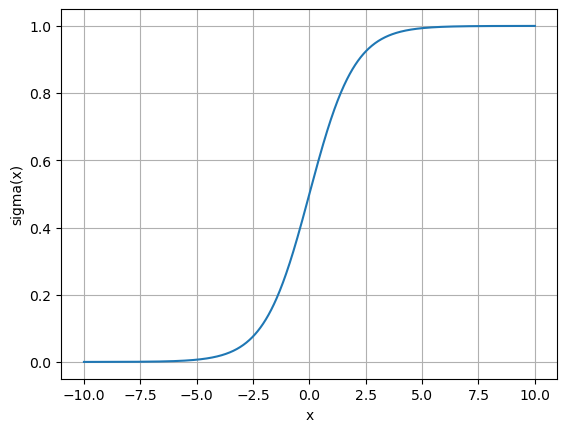

In [27]:
def sigma(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 1000)
y = sigma(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigma(x)')
plt.grid(True)

$$
\begin{aligned}
\frac{d\sigma(t)}{dt} &= \frac{d}{dt}\frac{1}{1+e^{-t}}
= \frac{d}{dt}(1+e^{-t})^{-1}\\
&= -(1+e^{-t})^{-2}\cdot(-e^{-t})
= \frac{e^{-t}}{(1+e^{-t})^2}\\
&= \frac{1}{1+e^{-t}}\cdot\frac{e^{-t}}{1+e^{-t}}\\
&= \sigma(t)\cdot(1-\sigma(t))
\end{aligned}
$$

### Sigmoid函数

Sigmoid函数是一种在机器学习和深度学习中广泛使用的激活函数，特别是在逻辑回归和早期的神经网络中。它的数学表达式为：

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

其中，(e) 是自然对数的底数，约等于2.71828，(x) 是函数的输入。

Sigmoid函数的特点包括：

1. **输出范围**：Sigmoid函数的输出值在0和1之间，这使得它特别适用于将任意实值映射到概率区间，因此常用于二分类问题中。
2. **形状**：Sigmoid函数的图形是一个S形曲线（因此得名Sigmoid），在输入值很大或很小的时候，函数值趋近于1或0，而在输入值接近0时，函数值接近0.5。
3. **导数**：Sigmoid函数的导数可以用函数本身表示，即 $\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$。这个性质在神经网络的反向传播算法中非常有用，因为它可以简化梯度的计算。

尽管Sigmoid函数在早期的神经网络模型中非常流行，但它也有一些缺点，如梯度消失问题（在输入值很大或很小的时候，函数的梯度接近0，这会导致在训练深层神经网络时梯度更新非常缓慢）和非零中心化输出（这可能会导致后一层的神经元的输入在迭代过程中偏向一个方向，从而影响收敛速度）。因此，在现代深度学习模型中，其他激活函数如ReLU及其变体往往更受欢迎。

随机变量$X$只取两个值0和1
$$
P(X=1) = p, \quad P(X=0) = 1-p
$$
则$X$服从Bernoulli(伯努利, 0-1)分布, 记为$X\sim B(p)$ , 其概率函数:
$$
f(x|p) = \left\{ \begin{array}{ll}
p^x(1-p)^{1-x}, &  x=0,1\\
0, &  x \neq 0,1
\end{array} \right.
$$

### Loss Function(Cost Function)
根据已知的$X$和$y$，找到一组参数$\theta$，使得$P(y=1|X;\theta)$尽可能大，即$P(y=1|X;\theta)$与$y$的差距尽可能小。

$$\begin{aligned}
\hat{y} &= \sigma(\theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_mx_m)\\
&= h_{\theta}(x)
\end{aligned}$$
$$
\begin{aligned}
&\hat{y} = P(y=1|X;\theta)\\
&1-\hat{y} = P(y=0|X;\theta)
\end{aligned}
$$
整合:
$$
P(y|X;\theta) = \hat{y}^y(1-\hat{y})^{1-y}
$$
假设训练样本互相独立, 则似然函数为:
$$
\begin{aligned}
L(\theta) &= \prod_{i=1}^{n}P(y^{(i)}|x^{(i)};\theta)\\
&= \prod_{i=1}^{n} h_{\theta}(x^{(i)})^{y^{(i)}}(1-h_{\theta}(x^{(i)}))^{1-y^{(i)}}
\end{aligned}

对数转换:
$$
\begin{aligned}
l(\theta) &= \log L(\theta)\\
&= \sum_{i=1}^{n} y^{(i)}\log h_{\theta}(x^{(i)}) + (1-y^{(i)})\log(1-h_{\theta}(x^{(i)})
\end{aligned}
$$

因为$l(\theta)$是最大似然估计, 所以$l(\theta)$越大越好, 也就是说$J(\theta) = -l(\theta)$越小越好。损失函数:
$$
J(\theta) = -l(\theta)
$$

#### 可视化

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# 预先包含在Scikit-learn安装包中的数据集
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
n_samples = X.shape[0]
# X.shape, y.shape, breast_cancer.feature_names
# mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension
X_1to2 = X[:, :2]
# X_1to2.shape, X.shape, X[0].shape
std_scaler = StandardScaler()
X_1to2_scaled = std_scaler.fit_transform(X_1to2)

In [100]:
LgR_model = LogisticRegression()
LgR_model.fit(X_1to2, y)
w1 = LgR_model.coef_[0][0]
w2 = LgR_model.coef_[0][1]
b = LgR_model.intercept_[0]
w1, w2, b

(-1.046288751247195, -0.21689189756600347, 19.671897285990934)

In [75]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

$$
\begin{aligned}
J(\theta) &= -\sum_{i=1}^{n}\left[y^{(i)}\ln h_{\theta}(x^{(i)}) + (1-y^{(i)})\ln(1-h_{\theta}(x^{(i)})\right]\\
&= -y\ln h_{\theta}(x) - (1-y)\ln(1-h_{\theta}(x))
\end{aligned}

$$

In [76]:
def compute_loss(X, y, w1, w2):
    # 默认偏置为0
    z = X_1to2_scaled[:, 0] * w1 + X_1to2_scaled[:, 1] * w2
    y_pred = sigmoid(z)
    epsilon = 1e-9
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

In [87]:
import numpy as np
w1_space = np.linspace(w1 - 9, w1 + 4, 100)
w2_space = np.linspace(w2 - 9, w2 + 4, 100)
# w2 = 最优值时, w1变化时的loss
loss1_ = [compute_loss(X_1to2_scaled, y, w1_i, w2) for w1_i in w1_space]
# w1 = 最优值时, w2变化时的loss
loss2_ = [compute_loss(X_1to2_scaled, y, w1, w2_i) for w2_i in w2_space]

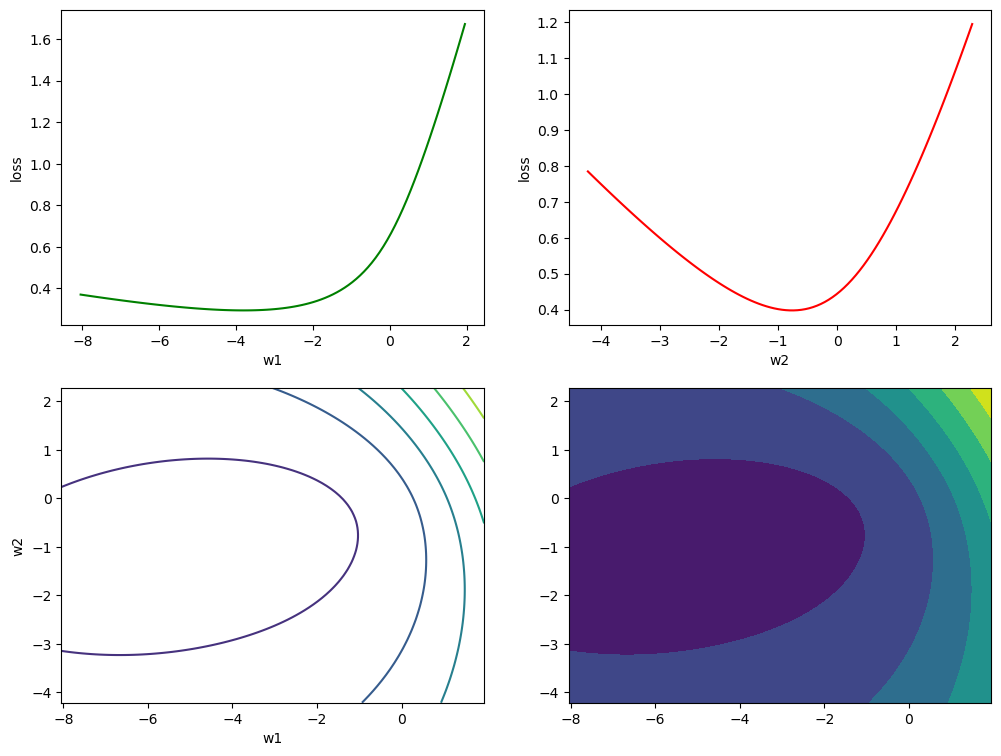

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure(figsize=(12, 9))
plt.subplot(2, 2, 1)
plt.plot(w1_space, loss1_, color='g')
plt.xlabel('w1');plt.ylabel('loss')
plt.subplot(2, 2, 2)
plt.plot(w2_space, loss2_, color='r')
plt.xlabel('w2');plt.ylabel('loss')

plt.subplot(2, 2, 3)
w1_grid, w2_grid = np.meshgrid(w1_space, w2_space)
loss_grid = np.array([[compute_loss(X_1to2_scaled, y, w1_i, w2_j) for w1_i in w1_space] for w2_j in w2_space])
plt.contour(w1_grid, w2_grid, loss_grid)
plt.xlabel('w1');plt.ylabel('w2')

plt.subplot(2, 2, 4)
plt.contourf(w1_grid, w2_grid, loss_grid)

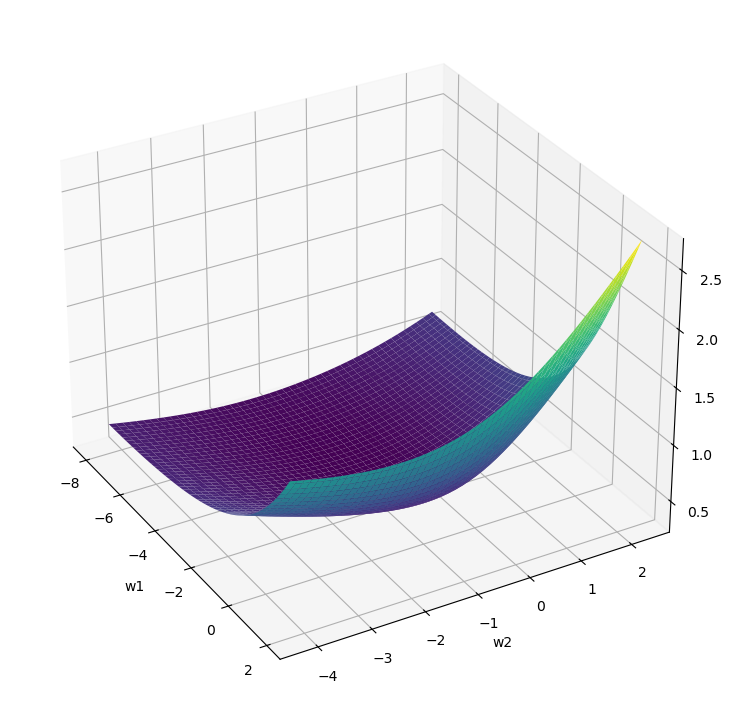

In [94]:
fig2 = plt.figure(figsize=(12, 9))
ax = fig2.add_subplot(111, projection='3d')
ax.plot_surface(w1_grid, w2_grid, loss_grid, cmap='viridis')
plt.xlabel('w1');plt.ylabel('w2')
ax.view_init(elev=30, azim=-30)

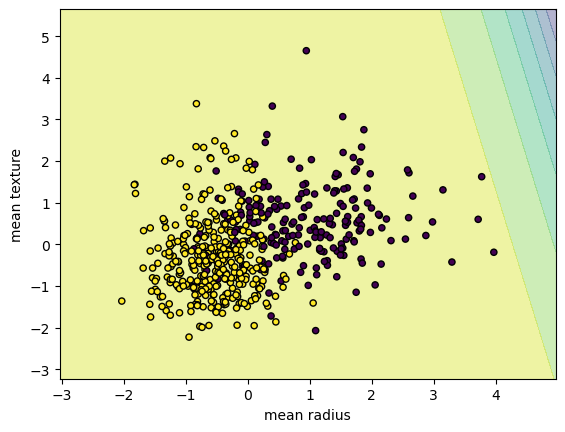

In [97]:
def plot_boundary(X, y, w1, w2, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = sigmoid(w1 * xx.ravel() + w2 * yy.ravel() + b)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.show()

plot_boundary(X_1to2_scaled, y, w1, w2, b)

### iris 鸢尾花分类

这个iris数据集包含150个样本，分为3类，每类50个数据，每个数据包含4个属性(特征)，分别是花萼长度、花萼宽度、花瓣长度、花瓣宽度，目标值为鸢尾花的类别，分别是Setosa、Versicolour、Virginica。

这里逻辑回归处理二分类问题，所以只取前100个样本，分为两类，Setosa 和Versicolour，分别用0和1表示。(去掉 Virginica )

In [104]:
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)
print(X.shape, y.shape, y)
cond = y != 2
X = X[cond]
y = y[cond]
print(X.shape, y.shape, y)

(150, 4) (150,) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(100, 4) (100,) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


split

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fit

In [111]:
LgR_model = LogisticRegression()
LgR_model.fit(X_train, y_train)
y_pred = LgR_model.predict(X_test)
print(y_pred); print(y_test)

probabilities = LgR_model.predict_proba(X_test)
print(f'probabilities:\n {probabilities}')

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
probabilities:
 [[0.00118455 0.99881545]
 [0.01579803 0.98420197]
 [0.00304709 0.99695291]
 [0.96959941 0.03040059]
 [0.94269372 0.05730628]
 [0.97161144 0.02838856]
 [0.99356322 0.00643678]
 [0.0316902  0.9683098 ]
 [0.97460702 0.02539298]
 [0.9789308  0.0210692 ]
 [0.95512884 0.04487116]
 [0.96072669 0.03927331]
 [0.00430743 0.99569257]
 [0.98586374 0.01413626]
 [0.00927792 0.99072208]
 [0.98146423 0.01853577]
 [0.00207948 0.99792052]
 [0.00125531 0.99874469]
 [0.97461564 0.02538436]
 [0.96116169 0.03883831]]


#### 手动实现

##### probability 实现

In [116]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
w = LgR_model.coef_
b = LgR_model.intercept_
# print(f'w.shape: {w.shape}, b.shape: {b.shape}')
# print(f'w: {w}, b: {b}')
z = X_test @ w.T + b
y_pred = sigmoid(z)
# print(f'y_pred.T:\n {y_pred.T}')
predict_proba = np.column_stack((1 - y_pred, y_pred))
print(f'predict_proba:\n {predict_proba}')

predict_proba:
 [[0.00118455 0.99881545]
 [0.01579803 0.98420197]
 [0.00304709 0.99695291]
 [0.96959941 0.03040059]
 [0.94269372 0.05730628]
 [0.97161144 0.02838856]
 [0.99356322 0.00643678]
 [0.0316902  0.9683098 ]
 [0.97460702 0.02539298]
 [0.9789308  0.0210692 ]
 [0.95512884 0.04487116]
 [0.96072669 0.03927331]
 [0.00430743 0.99569257]
 [0.98586374 0.01413626]
 [0.00927792 0.99072208]
 [0.98146423 0.01853577]
 [0.00207948 0.99792052]
 [0.00125531 0.99874469]
 [0.97461564 0.02538436]
 [0.96116169 0.03883831]]


### GD

逻辑回归的损失函数是凸函数，可以使用梯度下降法来求解最优参数。逻辑回归的梯度下降算法与线性回归类似，只是在计算预测值时使用了Sigmoid函数。

$$
\theta_j^{n+1} = \theta_j^n - \eta\cdot\frac{\partial J}{\partial \theta_j}
$$
$$
h_{\theta}(x) = g(\theta^Tx) = g(z) = \frac{1}{1+e^{-z}} = \sigma(z)
$$
$$
z = \theta^Tx
$$
$$
g'(z) = g(z)(1-g(z))
$$
Loss Function:
$$
J(\theta) = -\sum_{i=1}^{n}\left[y^{(i)}\ln h_{\theta}(x^{(i)}) + (1-y^{(i)})\ln(1-h_{\theta}(x^{(i)})\right]
$$

$$
\begin{aligned}
\frac{\partial J}{\partial \theta_j} &= -\sum_{i=1}^{n}\left[y^{(i)}\frac{1}{h_{\theta}(x^{(i)})}\frac{\partial h_{\theta}(x^{(i)})}{\partial \theta_j} + (1-y^{(i)})\frac{1}{1-h_{\theta}(x^{(i)})}\frac{\partial (1-h_{\theta}(x^{(i)}))}{\partial \theta_j}\right]\\
&= -\sum_{i=1}^{n}\left[y^{(i)}\frac{1}{h_{\theta}(x^{(i)})}h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))x^{(i)}_j - (1-y^{(i)})\frac{1}{1-h_{\theta}(x^{(i)})}h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))x^{(i)}_j\right]\\
&= -\sum_{i=1}^{n}\left[y^{(i)}(1-h_{\theta}(x^{(i)}))x^{(i)}_j - (1-y^{(i)})h_{\theta}(x^{(i)})x^{(i)}_j\right]\\
&= -\sum_{i=1}^{n}\left[y^{(i)}-h_{\theta}(x^{(i)})\right]x^{(i)}_j
\end{aligned}
$$

逻辑回归迭代公式:
$$
\theta_j^{n+1} = \theta_j^n - \eta\cdot\sum_{i=1}^{n}\left[h_{\theta}(x^{(i)})-y^{(i)}\right]x^{(i)}_j
$$

### OVR(One-vs-Rest)

一种处理多分类问题的策略。在标准的逻辑回归模型中，模型被设计为处理二分类问题，即预测某个观测值属于两个类别中的哪一个。然而，在实际应用中，我们经常遇到多分类问题，即目标变量有多于两个的类别。为了使用逻辑回归处理这种类型的问题，可以采用OVR策略

1. **为每个类别创建一个二分类器**：如果有N个类别，就创建N个逻辑回归模型。每个模型负责将一个类别与其它所有类别区分开来。
2. **训练**：对于每个类别，将该类别的样本作为正例，所有其他类别的样本作为负例，训练一个逻辑回归模型。这意味着每个模型都学习如何区分两个“大类”：一个是它专门代表的类别，另一个是所有其他类别的合集。
3. **预测**：对于一个新的观测值，所有N个模型都会进行预测，每个模型给出该观测值属于其代表的类别的概率。最终，观测值被分类到概率最高的那个类别。

OVR策略的一个优点是实现简单，每个类别的分类器都是独立训练的，这使得训练过程可以并行化。然而，这种方法的一个潜在缺点是，由于每个分类器都是在不平衡的数据集上训练的（一个类别对多个类别），这可能会影响模型的性能。

#### iris 鸢尾花分类

In [120]:
X, y = datasets.load_iris(return_X_y=True)
# print(X.shape, y.shape, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024)

In [123]:
LgR_ovr_model = LogisticRegression(multi_class='ovr')
LgR_ovr_model.fit(X_train, y_train)
y_pred = LgR_ovr_model.predict(X_test)
print(y_pred); print(y_test)
LgR_ovr_model.score(X_test, y_test)

[1 0 2 2 0 0 1 2 1 0 0 0 1 2 1 0 1 0 2 0 2 0 1 0 2 1 2 2 2 2]
[1 0 2 2 0 0 1 2 1 0 0 0 1 2 1 0 1 0 2 0 2 0 1 0 2 1 2 2 2 2]


1.0

In [126]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
(y_pred == y_test).mean()

1.0


1.0

In [128]:
np.set_printoptions(suppress=True)
print(LgR_ovr_model.predict_proba(X_test))

[[0.15341379 0.83997188 0.00661434]
 [0.81156522 0.18842332 0.00001146]
 [0.00001367 0.31456352 0.68542281]
 [0.00087416 0.43024593 0.56887991]
 [0.79198777 0.20800671 0.00000552]
 [0.86111735 0.13887887 0.00000378]
 [0.00650464 0.84075035 0.15274502]
 [0.00019236 0.19353609 0.80627155]
 [0.01377757 0.65812617 0.32809626]
 [0.84338687 0.15660797 0.00000516]
 [0.97259064 0.02740749 0.00000187]
 [0.61604042 0.38395562 0.00000397]
 [0.02122229 0.82505571 0.153722  ]
 [0.00017314 0.14266266 0.8571642 ]
 [0.00160292 0.59677128 0.4016258 ]
 [0.9018698  0.09812672 0.00000348]
 [0.00847966 0.59204299 0.39947734]
 [0.86608459 0.13391136 0.00000404]
 [0.00030603 0.49084481 0.50884917]
 [0.91329907 0.08668852 0.00001241]
 [0.00027917 0.37119016 0.62853067]
 [0.90458793 0.09540935 0.00000272]
 [0.3009253  0.69546906 0.00360564]
 [0.75608675 0.24390785 0.0000054 ]
 [0.00023568 0.20502906 0.79473526]
 [0.02404278 0.90049057 0.07546665]
 [0.00066261 0.27392604 0.72541135]
 [0.00009429 0.43076054 0.56

In [129]:
LgR_ovr_model.coef_, LgR_ovr_model.intercept_

(array([[-0.45274112,  0.77715355, -2.22883851, -0.8739056 ],
        [-0.41612853, -1.98241361,  0.82177394, -1.26289797],
        [-0.28816967, -0.49842567,  2.70309937,  2.2345087 ]]),
 array([  6.82616908,   6.16258086, -13.7269597 ]))

In [133]:
y_self_pred = X_test @ LgR_ovr_model.coef_.T + LgR_ovr_model.intercept_
p = sigmoid(y_self_pred)
p = p / p.sum(axis=1, keepdims=True)
p

array([[0.15341379, 0.83997188, 0.00661434],
       [0.81156522, 0.18842332, 0.00001146],
       [0.00001367, 0.31456352, 0.68542281],
       [0.00087416, 0.43024593, 0.56887991],
       [0.79198777, 0.20800671, 0.00000552],
       [0.86111735, 0.13887887, 0.00000378],
       [0.00650464, 0.84075035, 0.15274502],
       [0.00019236, 0.19353609, 0.80627155],
       [0.01377757, 0.65812617, 0.32809626],
       [0.84338687, 0.15660797, 0.00000516],
       [0.97259064, 0.02740749, 0.00000187],
       [0.61604042, 0.38395562, 0.00000397],
       [0.02122229, 0.82505571, 0.153722  ],
       [0.00017314, 0.14266266, 0.8571642 ],
       [0.00160292, 0.59677128, 0.4016258 ],
       [0.9018698 , 0.09812672, 0.00000348],
       [0.00847966, 0.59204299, 0.39947734],
       [0.86608459, 0.13391136, 0.00000404],
       [0.00030603, 0.49084481, 0.50884917],
       [0.91329907, 0.08668852, 0.00001241],
       [0.00027917, 0.37119016, 0.62853067],
       [0.90458793, 0.09540935, 0.00000272],
       [0.

### 多分类 Softmax Regression

多项分布(Multinomial Distribution)是二项分布的推广，投掷一枚硬币是二项分布，投掷一枚骰子是多项分布。

$y$ 有 $k$ 个类别，$y\in\{1,2,\cdots,k\}$

每种类别的概率: $\phi_i=P(y=i)$, 由于 $\sum_{i=1}^{k}\phi_i=1$, 所以一般用 $k-1$ 个参数。
$$
\begin{aligned}
P(y=i;\phi) &= \phi_i \quad\quad i=1,2,\cdots,k-1\\
P(y=k;\phi) &= 1-\sum_{i=1}^{k-1}\phi_i
\end{aligned}
$$

为了将多项分布表达为指数族分布:

定义: $T(y) \in R^{k-1}$
$$
T(1)=\left(\begin{array}{c}
1\\
0\\
\vdots\\
0
\end{array}\right),\quad
T(2)=\left(\begin{array}{c}
0\\
1\\
\vdots\\
0
\end{array}\right),\quad
\cdots,\quad
T(k-1)=\left(\begin{array}{c}
0\\
0\\
\vdots\\
1
\end{array}\right)
\\
T(k)=\left(\begin{array}{c}
0\\
0\\
\vdots\\
0
\end{array}\right)
$$
引进指示函数: $I\{y=i\}$ , 当 $y=i$ 时为1, 否则为0
$$
E(T(y)_i) = p(y=i) = \phi_i
$$

$$\begin{aligned}
P(y;\phi) &= \phi_1^{I\{y=1\}}\phi_2^{I\{y=2\}}\cdots\phi_k^{I\{y=k\}}\\
&= \phi_1^{I\{y=1\}}\phi_2^{I\{y=2\}}\cdots\phi_k^{1-\sum_{i=1}^{k-1}I\{y=i\}}\\
&= \phi_1^{I\{y=1\}}\phi_2^{I\{y=2\}}\cdots\phi_k^{1-\sum_{i=1}^{k-1}T(y)_i}\\
&= \exp\left(\sum_{i=1}^{k-1}T(y)_i\log\phi_i + (1-\sum_{i=1}^{k-1}T(y)_i)\log\phi_k\right)\\
&= \exp\left(\sum_{i=1}^{k-1}T(y)_i\log\frac{\phi_i}{\phi_k} + \log\phi_k\right)
\end{aligned}$$

指数分布族标准表达式:
$$
P(y;\eta) = b(y)\exp(\eta^TT(y)-a(\eta))
$$
模型中对应的参数:
$$
\begin{aligned}
\eta &= \left(\begin{array}{c}
\log\frac{\phi_1}{\phi_k}\\
\log\frac{\phi_2}{\phi_k}\\
\vdots\\
\log\frac{\phi_{k-1}}{\phi_k}
\end{array}\right)\\
T(y) &= \left(\begin{array}{c}
I\{y=1\}\\
I\{y=2\}\\
\vdots\\
I\{y=k-1\}
\end{array}\right)\\
a(\eta) &= -\log\phi_k\\
b(y) &= 1
\end{aligned}
$$


多项分布属于指数分布族, 进而推导出Softmax概率函数:
$$
\begin{aligned}
\eta_i = \log\frac{\phi_i}{\phi_k} &\Rightarrow \phi_i = \phi_k e^{\eta_i}\\
\sum_{i=1}^{k}\phi_i = 1 &\Rightarrow \sum_{i=1}^{k}\phi_k e^{\eta_i} = 1\\
&\Rightarrow \phi_k = \frac{1}{\sum_{i=1}^{k} e^{\eta_i}}\\
&\Rightarrow \phi_i = \frac{e^{\eta_i}}{\sum_{i=1}^{k}e^{\eta_i}}
\end{aligned}
$$

假设 $\eta = \theta^Tx$ , 则:
$$
\begin{aligned}
P(y=i|x;\theta) &= \phi_i \\
&= \frac{e^{\theta_i^Tx}}{\sum_{j=1}^{k}e^{\theta_j^Tx}}
\end{aligned}
$$
这个模型被应用到多分类问题中，称为Softmax回归, 假设函数 $h_{\theta}(x)$:
$$
h_{\theta}(x) =\left\{ \begin{array}{c} 
P(y=1|x;\theta) \\
P(y=2|x;\theta) \\
\vdots \\
P(y=k|x;\theta)
\end{array} \right.
$$